<a href="https://colab.research.google.com/github/pedroafleite/instacart-market-basket-analysis/blob/main/instacart_1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
aisles = pd.read_csv('/content/drive/MyDrive/instacart/aisles.csv')
departments = pd.read_csv('/content/drive/MyDrive/instacart/departments.csv')
order_products_prior = pd.read_csv('/content/drive/MyDrive/instacart/order_products__prior.csv')
order_products_train = pd.read_csv('/content/drive/MyDrive/instacart/order_products__train.csv')
orders = pd.read_csv('/content/drive/MyDrive/instacart/orders.csv')
products = pd.read_csv('/content/drive/MyDrive/instacart/products.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/instacart/sample_submission.csv')

In [ ]:
order_products_prior.shape

(32434489, 4)

In [ ]:
order_products_train.shape

(1384617, 4)

In [ ]:
len(order_products_prior) + len(order_products_train)

33819106

In [ ]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,Week days,8,NaN
1,2398795,1,prior,2,Week days,7,15.0
2,473747,1,prior,3,Week days,12,21.0
3,2254736,1,prior,4,Week days,7,29.0
4,431534,1,prior,5,Week days,15,28.0


In [ ]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


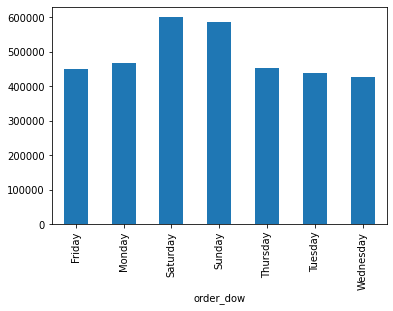

In [ ]:
#2) Data exploration
orders.columns #seems to be good for exploring the time in which purchases were made
orders.dtypes
#Day of the week
orders.groupby('order_dow')['order_id'].count() #dow meaning 'day of the week'
#values go from 0 to 6, but no documentation available regarding that
#I would say that it starts on a saturday, since saturday and sunday should have the largest numbers (0 and 1 in this case)
#I argue that supported from experience of all else
days = {0:'Saturday', 1:'Sunday', 2:'Monday', 3:'Tuesday', 
        4:'Wednesday', 5:'Thursday', 6:'Friday'}
orders['order_dow'] = orders['order_dow'].map(days) 

orders.groupby('order_dow')['order_id'].count().plot(kind="bar")

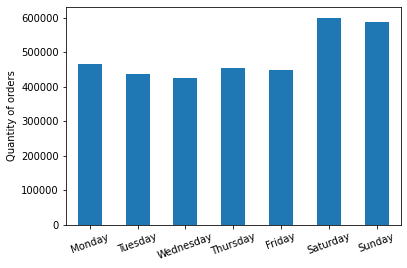

In [ ]:
#Reorder days of the week as shown in plot
dow = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                    'Friday', 'Saturday', 'Sunday']
mapping = {order_dow: i for i, order_dow in enumerate(dow)}
key = orders['order_dow'].map(mapping)
orders = orders.iloc[key.argsort()]

m1 = orders.groupby('order_dow', sort=False)['order_id'].count().plot(kind="bar")
plt.ylabel('Quantity of orders')
plt.xlabel('')
plt.yticks(rotation=0)
plt.xticks(rotation=20)
plt.show()

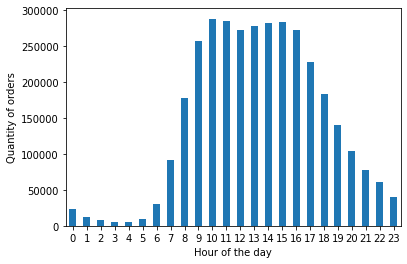

In [ ]:
m2 = orders.groupby('order_hour_of_day')['order_id'].count().plot(kind="bar")
plt.ylabel('Quantity of orders')
plt.xlabel('Hour of the day')
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.show()

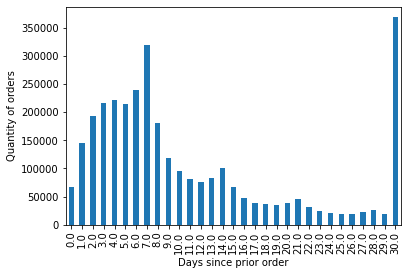

In [ ]:
#Days since prior order
m3 = orders.groupby('days_since_prior_order')['order_id'].count().plot(kind="bar")
plt.ylabel('Quantity of orders')
plt.xlabel('Days since prior order')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

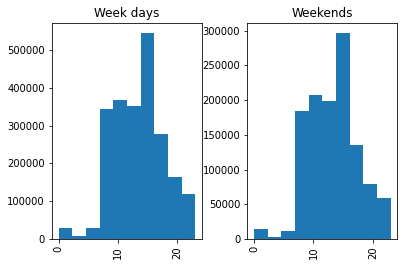

In [ ]:
#Compare hour of the day by each day of the week to check for overlaps
orders = pd.read_csv('/content/drive/MyDrive/instacart/orders.csv') #reload csv
days = {0:'Saturday', 1:'Sunday', 2:'Monday', 3:'Tuesday', 
        4:'Wednesday', 5:'Thursday', 6:'Friday'}
orders['order_dow'] = orders['order_dow'].map(days) 
compare_days = {'Saturday':'Weekends', 'Sunday':'Weekends', 
                'Monday': 'Week days', 'Tuesday':'Week days', 
                'Wednesday':'Week days', 'Thursday':'Week days', 
                'Friday':'Week days'}
orders['order_dow'] = (orders['order_dow'].map(compare_days))

m4 = orders['order_hour_of_day'].hist(by=orders['order_dow']) #roughly the same distribution

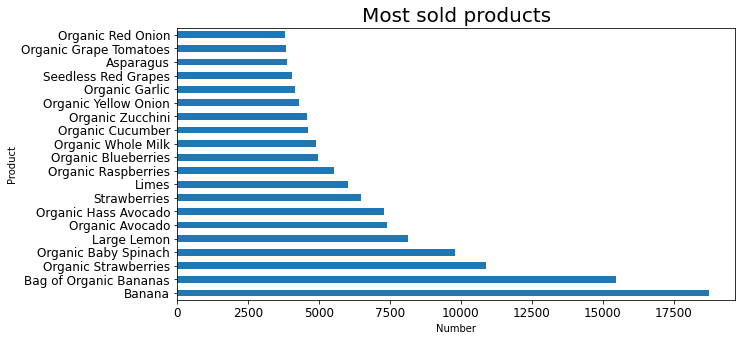

In [ ]:
#Create merge of orders and products
order1 = order_products_train.merge(products, how='inner')
order1 = order1.sort_values(by=['order_id','add_to_cart_order'])

order1['product_name'].value_counts().head(20).plot(
    kind='barh', figsize=(10,5), fontsize=12)
plt.title('Most sold products', fontsize = 20)
plt.ylabel('Product')
plt.xlabel('Number')
plt.show()